Krista Miller \
Data Science Tools Assignment 4

Goal: The goal of this assignment is to give you the opportunity to implement K-NN from scratch as well as using tools built into sklearn.  You would also compare your algorithms with other algorithms. 

In [39]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Question 1

a) Read the data provided on canvas into Python.  Print the first 5 rows of each dataset to inspect the nature of data

In [40]:
delivery_train = pd.read_csv('delivery_time_train_data.csv')
delivery_test = pd.read_csv('delivery_time_test_data.csv')
student_train = pd.read_csv('student_train_data.csv')
student_test = pd.read_csv('student_test_data.csv')

display(delivery_train.head(5))
display(delivery_test.head(5))
display(student_train.head(5))
display(student_test.head(5))

,Miles,Deliveries,Time
0,100,4,9.3
1,50,3,4.8
2,100,4,8.9
3,100,2,6.5
4,50,2,4.2


,Miles,Deliveries,Time
0,50,3,4.6
1,65,2,5.5
2,80,1,6.3
3,70,1,6.2
4,70,5,8.5


,GPA,Age,Dropped
0,3.78,21,0
1,2.38,27,0
2,3.05,21,1
3,2.19,28,1
4,3.22,23,0


,GPA,Age,Dropped
0,2.49,26,1
1,2.67,29,0
2,2.86,29,1
3,2.21,26,0
4,2.91,20,1


b) Split the data into training and test set.  Print the shape of input and output data for the training and test sets. 

In [41]:
X_delivery_train = delivery_train[["Miles", "Deliveries"]]
y_delivery_train = delivery_train["Time"]

X_delivery_test = delivery_test[["Miles", "Deliveries"]]
y_delivery_test = delivery_test["Time"]

X_student_train = student_train[["GPA", "Age"]]
y_student_train = student_train["Dropped"]

X_student_test = student_test[["GPA", "Age"]]
y_student_test = student_test["Dropped"]

print(f'X_delivery_train: {X_delivery_train.shape}')
print(f'y_delivery_train: {y_delivery_train.shape}')
print(f'X_delivery_test: {X_delivery_test.shape}')
print(f'y_delivery_test: {y_delivery_test.shape}')

print(f'X_student_train: {X_student_train.shape}')
print(f'y_student_train: {y_student_train.shape}')
print(f'X_student_test: {X_student_test.shape}')
print(f'y_student_test: {y_student_test.shape}')

X_delivery_train: (199, 2)
y_delivery_train: (199,)
X_delivery_test: (101, 2)
y_delivery_test: (101,)
X_student_train: (400, 2)
y_student_train: (400,)
X_student_test: (100, 2)
y_student_test: (100,)


c) You would use the delivery data for **regression**: that is, miles ("Miles") and number of deliveries ("Deliveries") would be use an input to predict the total time it takes for a delivery truck to deliver Amazon packages.  You would write a k-nearest neighbor algorithm function that learns from the training set and predicts the output or y values of given test instances.  The input that the function takes include:

* X_train: pandas dataframe or 2D numpy array
* y_train: pandas series of 1D numpy array
* X_test: pandas dataframe or 2D numpy array
* K: the number of nearest neighbors.  The default value should be k=5 if no k value is passed during the function call

Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code).  Here is the pseudo code:

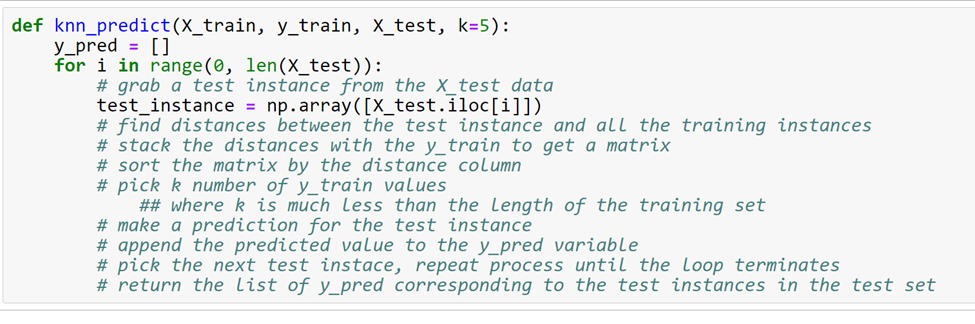

Call the knn_predict() function and pass the X_delivery_train, y_delivery_train, and X_delivery_test to compute the predicted output values for the X_delivery_test set.  You can reference the results using a variable, y_delivery_test_pred. 

In [75]:
from sklearn import metrics

def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for i in range(0, len(X_test)):
        # grab a test instance from the test data 
        test_instance = np.array([X_test.iloc[i]])
        
        #find distance between test instance and all training instances
        d=metrics.euclidean_distances(X_train,test_instance)
        
        # stack the distances with the y_train to get a matrix
        # sort the matrix by the distance column
        stacked=np.stack((d.flatten(),y_train.values),axis=1)
        stacked = stacked[np.argsort(stacked[:,-1])]
        
        # pick k number of y_train values
        y_train_nearest_k = stacked[np.argsort(stacked[:, 0])][0:k, -1]

        # make a prediction for the test instance
        predicted_y=np.mean(y_train_nearest_k)
        
        # append the predicted variable to the y_pred variable
        y_pred.append(predicted_y)
    
    return y_pred
        
y_delivery_test_pred = knn_predict(X_delivery_train,y_delivery_train,X_delivery_test)
print(y_delivery_test_pred[:10])


[5.14, 6.5, 6.6, 6.2, 9.16, 9.22, 7.140000000000001, 7.8199999999999985, 6.08, 6.6]


d) Write a function that computes the mean squared error to measure the performance accuracy of your knn algorithm.  The input that goes into the function is the actual output values (y) and the predicted output values (y_pred).  The mean squared error (mse) is calculated as follows:
mse = 1/n ∑_(1=1)^n▒(y-y_pred )^2  where n = length of y or length of y_pred
You can name the function mse. Then call the function to compute the mse for the test set for the delivery data. That is, use mse(y_delivery_test, y_delivery_test_pred). 

In [43]:

def mse(actual, predicted):
    
    summation = 0  
    n = len(actual) 
    for i in range (0,n):  
        difference = actual[i] - predicted[i]  
        squared_difference = difference**2   
        summation = summation + squared_difference  
    MSE = summation/n  
    return (float(MSE))


print("mse for test set for delivery data:")
test_train = y_delivery_test.to_numpy()
print(mse(test_train, y_delivery_test_pred))


mse for test set for delivery data:
1.0972554455445547


e) Does your algorithm overfit the data?  To answer this question, you need to compute the accuracy or mse of the algorithm on the training set, and compare with the accuracy or mse you got for the test set.  You will need to start with making predictions for the training set.  Note that you will need to pass the training set into the X_test parameter of the knn_predict() function, in addition to the other arguments of the function.  When you get the predicted values for the training set, use the mse() function to get the training mse.  

In [44]:
y_delivery_training_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train, k=5)

act_train = y_delivery_train.to_numpy()
print(mse(act_train, y_delivery_training_pred))

print ("no, the algorithm does not overfit the data- the training and test sets perform similarly")

0.5883557788944727
no, the algorithm does not overfit the data- the training and test sets perform similarly


f) Now, tune the hyperparameter, k, of your algorithm.  Specify a grid of hyperparameter values from k=1 to k=50.  Use a for-loop, then inside the for-loop body, use the knn_predict() function as well as the mse() function to compute the mse values for the training set and test set for different values of k in the hyperparameter grid.  Plot the training and test error rates of the model versus the grid of hyperparameter values.

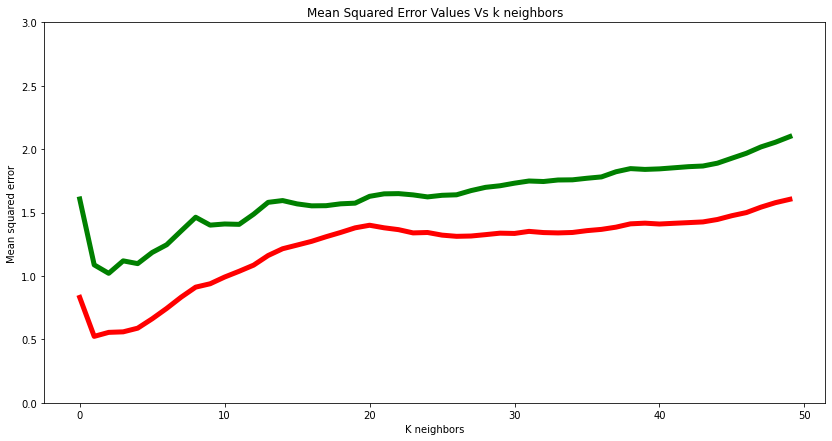

In [45]:
mse_list_train = []
mse_list_test = []
for i in range (1, 51):
    y_delivery_test_pred = knn_predict(X_delivery_train,y_delivery_train,X_delivery_test, k=i)
    mean_sq_error_test = mse(y_delivery_test, y_delivery_test_pred)
    mse_list_test.append(mean_sq_error_test)
    
    y_delivery_train_pred = knn_predict(X_delivery_train,y_delivery_train,X_delivery_train, k=i)
    mean_sq_error_train = mse(y_delivery_train, y_delivery_train_pred)
    mse_list_train.append(mean_sq_error_train)

    
plt.figure(figsize=(14, 7)) 
plt.ylim(0, 3)
plt.plot(*range(1, 51), mse_list_train,  lw=5, c="red")
plt.plot(*range(1, 51), mse_list_test,  lw=5, c="green")
plt.title("Mean Squared Error Values Vs k neighbors"); 
plt.xlabel("K neighbors")
plt.ylabel("Mean squared error")
plt.show()   

g) Now, construct and fit a k-nearest neighbor model using the KNeighborsRegressor() estimator in sklearn.neighbors module.  Use the mean_square_error() function inside the sklearn.metrics module to compute the mse of the model on the test set.  Is this similar to the mse value you got from the algorithm function you wrote from scratch?

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()   
knn.fit(X_delivery_train,y_delivery_train)

y_test_pred = knn.predict(X_delivery_test)

#compute mse of the model on the test set:
mse2 =mean_squared_error(y_delivery_test, y_test_pred)
print("Mean Squared Error:",mse2)

print("yes, this is similar to the mse value I got from the algorithm function that was written from scratch")

Mean Squared Error: 1.142752475247525
yes, this is similar to the mse value I got from the algorithm function that was written from scratch


h) Using the Pipeline constructor inside the sklearn.pipeline module, scale the X_delivery_train with the StandardScaler() and also construct the KNeighborsRegressor() inside the Pipeline().  Then call the fit() method on the pipeline object to fit the model into the delivery training data.  Transform the X_delivery_test data using StandardScaler() and use the mean_squared_error() function inside the sklearn.metrics module to compute the mse of the model on the test set.  Is this mse similar to the mse you got when you used the unscaled input data in (g) above?

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics

#scale the X_delivery_train and construct the kNN regressor inside the Pipeline:
pipe = Pipeline([('scaler', StandardScaler()), ('kNN', KNeighborsRegressor())])

#fit model with delivery training data:
pipe.fit(X_delivery_train, y_delivery_train)

#predict x input data with a fitted knn model:
pred_y = pipe.predict(X_delivery_test)

#compute mse of the model on the test set:
mse =mean_squared_error(y_delivery_test, pred_y)
print("Mean Squared Error:",mse)
print("yes, this mse value is similar to the unscaled input data")

Mean Squared Error: 1.0299128712871293
yes, this mse value is similar to the unscaled input data


i) Use the scaled X_delivery_train and X_delivery_test data and the RandomForestRegressor constructor insdie the sklearn.ensemble module to construct/fit a random forest model, then compute the mse for this model.  Is this mse similar to the one you got in question (h) above?

In [53]:
from sklearn.ensemble import RandomForestRegressor

pipe2 = Pipeline([('scaler', StandardScaler()), (('random_forest', RandomForestRegressor(max_depth=10,random_state=2)))])

pipe2.fit(X_delivery_train,y_delivery_train)

pred_y2 = pipe2.predict(X_delivery_test)

#compute mse of the model on the test set:
mse =mean_squared_error(y_delivery_test, pred_y2)
print("Mean Squared Error:",mse)
print("yes, this mse value is similar to the one above")

Mean Squared Error: 0.9624881868058709
yes, this mse value is similar to the one above


#### Question 2

a) You would use the standard data for **classification**: that is, GPA and Age would be used as input to predict whether a student will drop out of school (dropped=1) or not drop (dropped=0).  You will write a k-nearest neighbor algorithm function that learns from the training set and classifies given test instances to class 0 or class 1.  The input that the function takes include:
* X_train: Pandas DataFrame or 2D NumPy array
* y_train: Pandas series or 1D NumPy array
* X_test: Pandas DataFrame or 2D NumPy array
* K: the number of nearest neighbors.  The default value should be k=5 if no k value is passed during function call.  

Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code).  Here is the pseudo code:
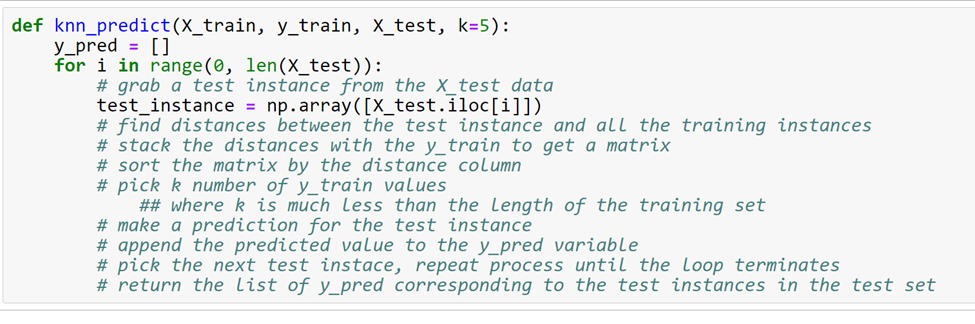

Scale the X_student_train and X_student_test data, and pass these scaled data sets in addition to y_student_train data into the knn_predict() function call to compute the predicted output values for the X_student_test set.  You can reference the results using a variable, y_student_test_pred. 

In [59]:
scaler = StandardScaler()

def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for i in range(0, len(X_test)):
        # grab a test instance from the test data 
        test_instance = np.array([X_test[i]])
        
        #find distance between test instance and all training instances
        d=metrics.euclidean_distances(X_train,test_instance)
        
        # stack the distances with the y_train to get a matrix
        # sort the matrix by the distance column
        stacked=np.stack((d.flatten(),y_train.values),axis=1)
        stacked = stacked[np.argsort(stacked[:,-1])]
        
        # pick k number of y_train values
        y_train_nearest_k = stacked[np.argsort(stacked[:, 0])][0:k, -1]

        # make a prediction for the test instance
        predicted_y=np.mean(y_train_nearest_k)
        
        # append the predicted variable to the y_pred variable
        y_pred.append(predicted_y)
    
    return y_pred

scaled_X_student_train = scaler.fit_transform(X_student_train)
scaled_X_student_test = scaler.fit_transform(X_student_test)
        
y_student_test_pred = knn_predict(scaled_X_student_train, y_student_train, scaled_X_student_test)
y_student_test_pred[:5]

[0.0, 0.6, 0.2, 0.2, 0.2]

b) Define a function called overall_accuracy that computes the overall accuracy of your algorithm.  You can let your function compare the actual values (y) and the predicted or classified y values (y_pred), for example, overall accuracy could be computed using mean(y=y_pred)

In [68]:
from numpy import mean

def overall_accuracy(y, y_pred):
    error = np.mean(y == y_pred)
    return (error)

overall_accuracy(y_student_test, y_student_test_pred)

0.12

c) Use GridSearch in scikit learn to tune the parameter of the k-nearest neighbor classifier, then use that optimal parameter to compute the accuracy of the knn estimator on the test set.  Is this accuracy score similar to that obtained using your knn algorithm from scratch?

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_student_train,y_student_train)
param_grid = dict(n_neighbors=list(range(1, 51)))
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
  
# fitting the model for grid search
gridsearch_output = grid.fit(scaled_X_student_train, y_student_train)
print(f'The best parameters using GridSearchCV: {gridsearch_output.best_params_}')

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_student_train,y_student_train)
y_student_test_pred = knn.predict(X_student_test)
print(f'The accuracy of the best parameters found using GridSearchCV: {overall_accuracy(y_student_test, y_student_test_pred)}')


The best parameters using GridSearchCV: {'n_neighbors': 19}
The accuracy of the best parameters found using GridSearchCV: 0.71


d) Also build another model using a random forest classifier and compute the accuracy score on the test set.  Which of these models is the better, the model in question 2c or this model in question 2d? Why or why not?

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier() 
rf_clf.fit(scaled_X_student_train, y_student_train)
 
y_student_test_pred = rf_clf.predict(scaled_X_student_test)
mse = mean_squared_error(y_student_test,y_student_test_pred)

print(overall_accuracy(y_student_test,y_student_test_pred) * 100)

66.0


KNN Classifier is a better model to use for predictions on the student dataset because the accuracy metric is higher than the random forest classifier. 

#### Question 3: Your own mini project

Find your own dataset suitable for classification or regression with at least three input variables and 200 or more cases: Depending on the target variable of interest, you would build a k-nearest neighbor classifier or regressor using the appropriate sklearn estimator. Find some interesting unique dataset that is not popularly used in the internet. 

Address the following and include code/output snippets from b) to f). Include the response under each sub question. 

a) State your research question

Can a raisin be accurately classified as a Kecimen or Besni variety using K nearest neighbors algorithm given the variables area, major axis length, minor axis length, eccentricity, convex area, extent, and perimeter measurements?

b) Data pre-processing (to the extend deemed necessary: remember the knn algorithm depends on distances, so you need to rescale, normalize or standardize your input values to make sure no variable influences the predictions due to it scale). 

In [26]:
raisins = pd.read_excel("Raisin_Dataset.xlsx")
raisins.head(5)

raisinFeatures = raisins.drop(['Class'], axis= 1)
raisinClasses = raisins['Class']

print(raisinClasses.tail())

895    Besni
896    Besni
897    Besni
898    Besni
899    Besni
Name: Class, dtype: object


In [27]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
raisinScaled = pd.DataFrame(scaler.fit_transform(raisinFeatures), columns=raisinFeatures.columns)
print(raisinScaled.head(5))

       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  0.296370         0.280714         0.314376      0.767872    0.255504   
1  0.237427         0.234638         0.284945      0.738636    0.208864   
2  0.312263         0.280741         0.351778      0.733009    0.268084   
3  0.097973         0.078935         0.186620      0.548194    0.084089   
4  0.257660         0.164011         0.422064      0.350968    0.219472   

     Extent  Perimeter  
0  0.831422   0.271791  
1  0.667854   0.241842  
2  0.565754   0.283594  
3  0.701809   0.108284  
4  0.906315   0.218493  


c) Data splitting

In [28]:
from sklearn.model_selection import train_test_split

X = raisinScaled
y = raisinClasses
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"shape X_train: {X_train.shape}")
print(f"shape y_train: {y_train.shape}")
print(f"shape X_test: {X_test.shape}")
print(f"shape y_test: {y_test.shape}")

shape X_train: (630, 7)
shape y_train: (630,)
shape X_test: (270, 7)
shape y_test: (270,)


d) Model construction

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train.values, y_train.values)

y_pred = neigh.predict(X_test.values)

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[109  20]
 [ 26 115]]


e) Hyperparameter tuning (choose whichever approach you like)

In [31]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train.values, y_train.values)
    pred_i = knn.predict(X_test.values)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

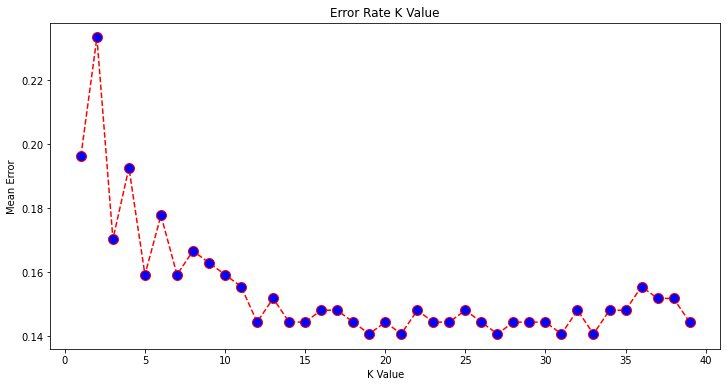

In [32]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

f) Use the best or optimal parameter values to build a model, then compute the accuracy score for your estimator. Discuss about overfitting for the model.

In [36]:
from sklearn.metrics import accuracy_score

neighbest = KNeighborsClassifier(n_neighbors=19)
neighbest.fit(X_train.values, y_train.values)

y_predbest = neighbest.predict(X_test.values)

y_train_pred = neighbest.predict(X_train.values)

#predictions on the training set:
acc_train = accuracy_score(y_true = y_train, y_pred = y_train_pred)
print("accuracy of training set:", acc_train)

#predictions on the test set:
print("accuracy of test set:", accuracy_score(y_test, y_predbest))


accuracy of training set: 0.873015873015873
accuracy of test set: 0.8592592592592593


This model's performance on the training data is 87% accuracy, and the test set is 85% accurate.  This seems to be slightly underfitting as it is poor performance on the training data and poor generalization to other data.